<a href="https://colab.research.google.com/github/doudi0101/ML-TPs/blob/main/RNN_Frozen_Desserts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Frozen_Dessert_Production.csv',
                 index_col = 'DATE',
                 parse_dates=True
                 )

In [ ]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [ ]:
df.columns = ['Production']

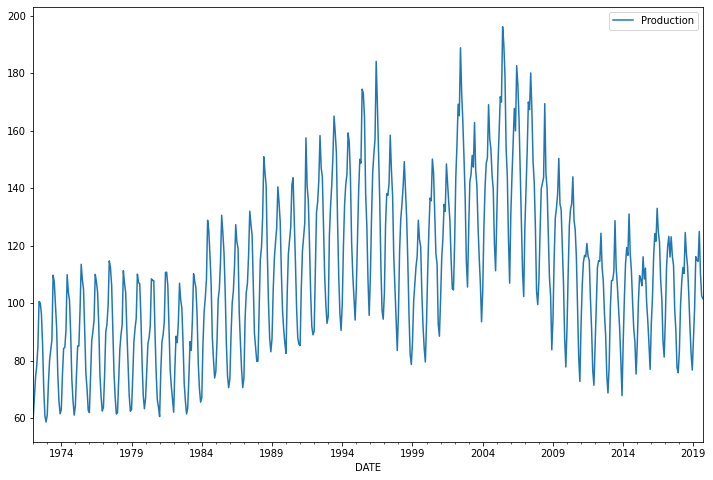

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
len(df)

573

In [ ]:
test_size = 24
test_ind = len(df) - test_size

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
len(test)

24

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 18
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length,
                               batch_size=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,
                                           scaled_test,
                                           length=length,
                                           batch_size=1)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [ ]:
model.fit_generator(generator,
                    epochs=500,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


531/531 [==============================] - 6s 8ms/step - loss: 0.0163 - val_loss: 0.0031
Epoch 2/500
531/531 [==============================] - 4s 7ms/step - loss: 0.0057 - val_loss: 0.0016
Epoch 3/500
531/531 [==============================] - 4s 7ms/step - loss: 0.0037 - val_loss: 0.0052
Epoch 4/500
531/531 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0040


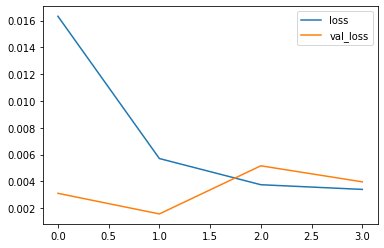

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],
                            [[current_pred]], 
                            axis=1)

1/1 [==============================] - 0s 15ms/step


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,86.033890
2017-11-01,77.4378,80.209429
2017-12-01,75.8118,81.139570
2018-01-01,83.4343,89.794931
2018-02-01,99.4899,101.088448
2018-03-01,107.3152,112.825936
2018-04-01,112.4309,122.045330
2018-05-01,110.3544,127.549115
2018-06-01,124.5841,126.494369


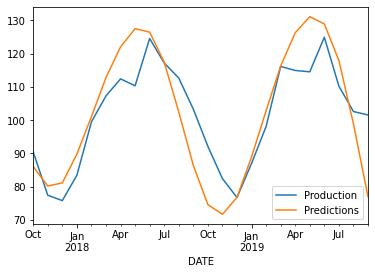

In [ ]:
test.plot()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

10.119218350235196